<a href="https://colab.research.google.com/github/khchoi-physik/pbh_simulations/blob/main/curve_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy as sp

import os
import glob

In [26]:
def gumbel(x,mu,beta):
    z  = (x-mu)/beta
    return beta**(-1) * np.exp( -( z+ np.exp(-z) ) )


def web

def gamma_dist(x,alpha,beta):

    gamma_pdf = ( (beta**alpha) / gamma(alpha) ) * (x**(alpha-1) ) * np.exp(- beta * x)

    return gamma_pdf

def exGPD(x, mu, sigma, zeta):

    y = (x-mu)
    exGPD_pdf = (np.exp(y)/sigma) * ( 1 + (zeta/sigma) * np.exp(y) )**(-1/zeta -1)
    #exGPD_pdf = (1/sigma) * ( 1 + zeta * y)**(-1/zeta -1)

    return exGPD_pdf

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [7]:
main_path = '/content/gdrive/MyDrive/2023 RFSimulations/simulated_results'
folder_path = main_path + '/block_maxima_data'

In [8]:
os.chdir(folder_path)
print(os.getcwd())


/content/gdrive/MyDrive/2023 RFSimulations/simulated_results/block_maxima_data


In [11]:


for l = [5]

['max_ampligude_l_5_k_2.npy', 'max_ampligude_l_5_k_3.npy', 'max_ampligude_l_5_k_0.npy', 'max_ampligude_l_5_k_1.npy']


['max_ampligude_l_32_k_1.npy', 'max_ampligude_l_32_k_0.npy', 'max_ampligude_l_32_k_3.npy', 'max_ampligude_l_32_k_2.npy']


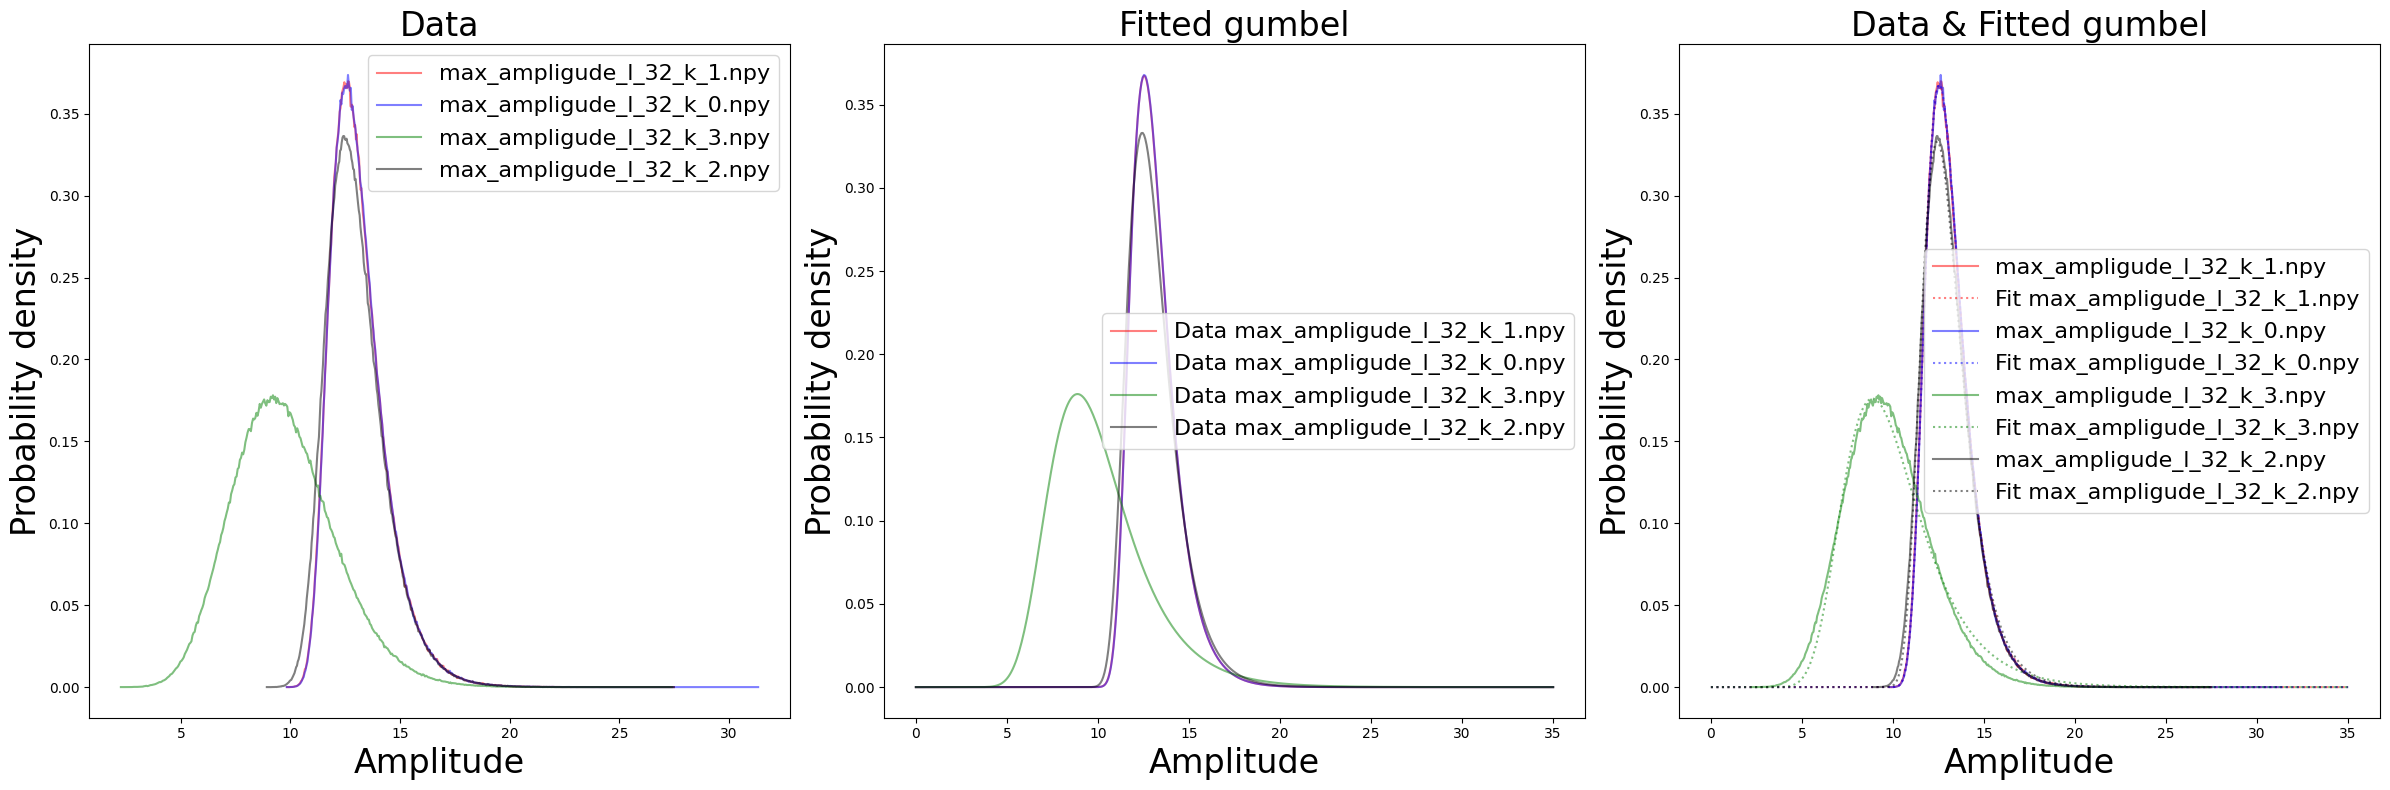

In [77]:
l = 32


colors = ['red', 'blue', 'green', 'black']
npy_list = glob.glob(f'max_ampligude_l_{l}*.npy')
print(npy_list)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (24,8))

for i,npy_file in enumerate(npy_list):
    data = np.load(f'{npy_file}')

    hists, bins = np.histogram(data, density =True, bins= 501)
    params  = sp.optimize.curve_fit(gumbel, bins[1:], hists)

    xrange = np.linspace(0,35,len(bins[1:]))


    ax1.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=npy_file)
    ax2.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Data {npy_file}')#

    ax3.plot(bins[1:], hists, c=colors[i% len(colors)], alpha=0.5 , label=npy_file)
    ax3.plot(xrange, gumbel(xrange, *params[0]), c=colors[i% len(colors)], alpha=0.5, label=f'Fit {npy_file}', linestyle=':')#

ax1.legend(fontsize= 16)
ax2.legend(fontsize= 16)
ax3.legend(fontsize= 16)
ax1.set_title('Data', fontsize= 24)
ax2.set_title('Fitted gumbel', fontsize= 24)
ax3.set_title('Data & Fitted gumbel', fontsize= 24)
ax1.set_xlabel('Amplitude', fontsize= 24)
ax2.set_xlabel('Amplitude', fontsize= 24)
ax3.set_xlabel('Amplitude', fontsize= 24)
ax1.set_ylabel('Probability density', fontsize= 24)
ax2.set_ylabel('Probability density', fontsize= 24)
ax3.set_ylabel('Probability density', fontsize= 24)
plt.tight_layout()
plt.show()